# Homework #3: Numerical Differentiation
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/12/2020|

In this notebook, we will attempt to numerically evaluate the derivative of

\begin{equation}
f(x) = \cos{x}
\tag{1}
\end{equation}

at an arbitrary position $x$.

## 1. Forward Difference Scheme

***1) You should find Error~$dx^n$; what is n? what is the optimal value for dx.***

The prescription for the numerical _forward difference_ derivative scheme at $x=x_0$ is as follows:

\begin{equation}
\frac{df(x_0)}{dx}\biggr\rvert_{fd} \equiv \frac{f(x_0+dx)-f(x_0)}{dx}.
\tag{2}
\end{equation}

In [1]:
def derivfd(func, x0, dx=0.1):
    """
    Find the first derivative of a function at a point.
    
    Given a function, use a forward difference formula with spacing `dx` to compute the 1st derivative at `x0`.
    
    Parameters
    ----------
    func : function
        Input function.
    x0 : float
        The point at which `n`-th derivative is found.
    dx : float, optional
        Spacing.
    """
    return (func(x0+dx)-func(x0))/dx

Let's try it out on $f(x) = \sin{x}, \quad-\pi < x < \pi$.

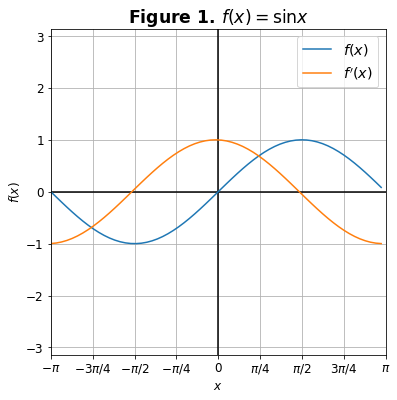

In [7]:
import numpy as np
import matplotlib.pyplot as plt

sin = lambda x: np.sin(x)
x = np.arange(-np.pi, np.pi, 0.1)

xticks = np.arange(-np.pi, np.pi+np.pi/4, np.pi/4)
xlabels = [r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',
           r'$-\pi/4$',0,r'$\pi/4$',
           r'$\pi/2$',r'$3\pi/4$',r'$\pi$']

plt.figure(figsize=[6,6])
plt.title(r'Figure 1. $f(x) = \sinx$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x$', fontsize='large')
plt.xlim(-np.pi,np.pi)
plt.xticks(xticks, xlabels, fontsize='large')
plt.ylabel(r'$f(x)$', fontsize='large')
plt.ylim(-np.pi, np.pi)
plt.yticks(fontsize='large')
plt.axhline(color='k')
plt.axvline(color='k')
plt.grid()
plt.plot(x, sin(x), label='$f(x)$')
plt.plot(x, derivfd(sin, x), label='$f^\prime(x)$')
plt.legend(loc='best', fontsize='x-large')
plt.show()

### Error Analysis
We can evaluate the absolute error of the forward difference scheme as a function of interval spacing $dx$. Analytically, we know the derivative of $\cos x$ to be $-\sin x$. And, from Eq. 1, we know the exact form for $x=\frac{\pi}{4}$ to be

\begin{equation}
f^\prime\left(\frac{\pi}{4}\right) = -\sin\left(\frac{\pi}{4}\right) = -\frac{\sqrt{2}}{2}.
\tag{3}
\end{equation}

Let's use this to calculate and plot the error for $dx = 10^{-n}$, $n=1,2,...,15,16.$

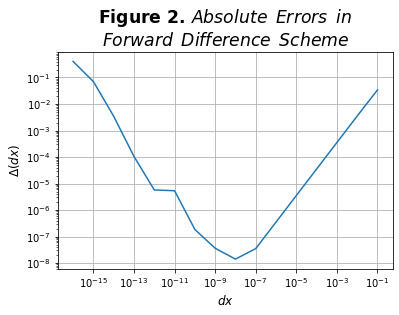

In [45]:
f = lambda x: np.cos(x)
x0 = np.pi/4
exact = -np.sqrt(2)/2
n = 17
dxs = []
deltas = np.zeros((n-1))

for i in range(1,n):
    dx = 10**(-i)
    dxs.append(dx)
    deltas[i-1] = abs(exact - derivfd(f, x0, dx))
    
plt.figure()
plt.title('Figure 2. $Absolute \hspace{0.5} Errors \hspace{0.5} in \hspace{0.5} $\n$ Forward \hspace{0.5} Difference \hspace{0.5} Scheme$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$dx$', fontsize='large')
plt.xscale('log')
plt.ylabel(r'$\Delta(dx)$', fontsize='large')
plt.yscale('log')
plt.grid()
plt.plot(dxs, deltas)
plt.show()

We can see from Fig. 2 that the _optimal value_ for the spacing $dx$ (i.e., yields the most precise result), is around $10^{-8}$, where the errors due to _round-off_ and _truncation_ roughly equal one another and are at a minimum.
***DO ESTIMATION***

## 2. Central Difference Scheme

***2) Repeat the exercise using the central difference scheme. Why this scheme is better?***




## 3. Central Difference Revisted

***3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)***

#### Consistent Theoretical Values
This slight diversion shows us that the use of `math.sqrt` in our `quadroots1` and `quadroots2` already yields values as accurate as machine precision will allow for the binomial series. But to quantify the relative error due to subtractive cancellation when $a=1, b=1, c=10^{-n}$, $n \in \mathbb{N^*}$, for successively larger $n$, we need to define _finite, theoretical_ values for the roots with which to compare.

If $x_{th}$ is the theoretical value of a quadratic root, and $x_c$ is the computed root, then the _absolute error_ is defined as

$$
\Delta \equiv |x_{th} - x_c|
$$

and the _relative error_ as

$$
\epsilon \equiv \frac{\Delta}{|x_{th}|}.
$$

The simplest, finite value for a theoretical quadratic root can be arrived at by taking the _first-order_ binomial series expansion of the square root of the discriminant. With $a=1, b=1$, from Eqs. 4 and 7,

\begin{align*}
\sqrt{1-4c} &= (1 - 4c)^{1/2}\\
&= 1 - \frac{1}{2}{4c}\\
&= 1 - 2c, \quad (c < 1)
\tag{8}
\end{align*}

Plugging this back into Eqs. 2 and 3, our "theoretical" roots (for $c < 1$) become

\begin{align*}
x_1 &= \frac{-1 + (1 - 2c)}{2} = -c \tag{9}\\
x_2 &= \frac{-1 - (1 - 2c)}{2} = c - 1 \tag{10}\\
x^\prime_1 &= \frac{-2c}{1 + (1 - 2c)} = \frac{-c}{1-c} \tag{11}\\
x^\prime_2 &= \frac{-2c}{1 - (1 - 2c)} = -1 \tag{12}\\
\end{align*}

In fact, in the limit as $c \rightarrow 0$, these "theoretical" prescriptions converge to the _exact, analytic_ roots for $a=b=1, c=0$: $x_1 = 0$ and $x_2 = -1$. We can now write a function to calculate our "theoretical" roots, which we'll then use to determine the relative error of our original two methods.